## Documentation on jupiter.py module and Analysis of the jupiter.db dataset.


#### The notebook has the following structure:
##### 1. Introduction: 
#####     &emsp; - A brief introduction to the notebook, explaining its purpose and contents (which you are reading right now).
##### 2. Usage Explanation of jupiter Module:
#####     &emsp; - Importing the Module: start by importing the Moons class from the jupiter module.
#####     &emsp; - Initializing the Class: Demonstrate how to initialize the Moons class with the path to the jupiter.db database.
#####     &emsp; - Exploring the Methods: go through the methods in the Moons class, demonstrating and explaining how to use each one.
##### 3. Data Analysis:
#####     &emsp; - We'll use the module to load and analyze the Jupiter's moons dataset. 
#####     &emsp; - This will include data loading, summary statistics, data cleaning, visualization, and trend location.
#####     &emsp; - Also apply a regression model if necessary



# 2. Usage Explanation of jupiter Module:

 First, import the Moons class from the jupiter module

In [1]:
from jupiter import Moons

Initialize the Moons class with the path to the jupiter.db database.

The 'moon' column is set as index of self.data by default in this module.

In [2]:
filepath='jupiter.db'
moons=Moons(filepath)

In [3]:

print(moons.data.columns)

Index(['period_days', 'distance_km', 'radius_km', 'mag', 'mass_kg', 'group',
       'ecc', 'inclination_deg'],
      dtype='object')


0. numerical_categorical_mapping (self, feature: string)

    Converts categorical feature(preferably literal) to numerical categorical feature
    - Replaces feature consiting of objects(or strings) with feature made of numbers 
    - Adds a feature_dictionary attribute (its a dictionary) to class. The dictionary is in form {unique objects: their id's in new feature}
    - Name of this attribute is 'feature name'+'_dictionary'

In [4]:
print("moons 'group' feature before conversion to numbers:\n")
print(moons.data['group'].head())

moons.numerical_categorical_mapping('group')#replace group names with numbers
print("\nmoons 'group' feature after conversion to numbers:\n")
print(moons.data['group'].head())

print("\nmoons 'group_dictionary' attribute after conversion to numbers:\n")
print(moons.group_dictionary)

moons 'group' feature before conversion to numbers:

moon
Adrastea       Inner
Aitne          Carme
Amalthea       Inner
Ananke        Ananke
Aoede       Pasiphae
Name: group, dtype: object

moons 'group' feature after conversion to numbers:

moon
Adrastea    0
Aitne       1
Amalthea    0
Ananke      2
Aoede       3
Name: group, dtype: int64

moons 'group_dictionary' attribute after conversion to numbers:

{'Inner': 0, 'Carme': 1, 'Ananke': 2, 'Pasiphae': 3, 'Galilean': 4, 'other': 5, 'Himalia': 6, 'Hamilia': 7}


Now, we will explore and demonstrate methods available in the Moons class.

1. summary_statistics (self)

    Getting summary statistics of the dataset
    - Returns a pandas dataframe with a statistical review of all the features in the dataset
    - This is also useful for single features as the function returns a pandas dataframe, so we can pick the ones we need


In [5]:
feature_stats= moons.summary_statistics()

print("Summary Statistics of all dataset:\n", feature_stats)
print("Summary Statistics of the 'period_days' feature:\n", feature_stats['period_days'])

Summary Statistics of all dataset:
        period_days   distance_km    radius_km        mag       mass_kg  \
count    56.000000  5.600000e+01    56.000000  53.000000  6.000000e+00   
mean    525.998146  1.775655e+07   158.969643  20.418302  6.551798e+22   
std     272.670243  8.253688e+06   557.730632   4.926587  6.010469e+22   
min       0.290000  1.280000e+05     1.000000   4.610000  2.080000e+18   
25%     258.750000  1.170252e+07     1.500000  20.800000  1.200276e+22   
50%     632.500000  2.129009e+07     2.000000  22.500000  6.865891e+22   
75%     725.500000  2.336375e+07    11.562500  23.000000  1.030252e+23   
max     787.000000  2.458309e+07  2634.100000  23.700000  1.481900e+23   

           group        ecc  inclination_deg  
count  56.000000  56.000000        56.000000  
mean    2.589286   0.222922       113.571607  
std     1.796732   0.126899        64.562822  
min     0.000000   0.000200         0.030000  
25%     1.000000   0.159201        30.582500  
50%     2.00000

 2. get_features (self)

    Listing all features (columns) in the dataset
    - Returns a LIST of features in the given dataset


In [6]:
features = moons.get_features()

print("Features in the dataset:\n", features)

Features in the dataset:
 ['period_days', 'distance_km', 'radius_km', 'mag', 'mass_kg', 'group', 'ecc', 'inclination_deg']


3. get_moons (self)

    Getting a list of moon names
    - Returns a list of moons in the dataset


In [7]:
moon_names = moons.get_moons()

print("List of Moons:\n", moon_names)

List of Moons:
 ['Adrastea', 'Aitne', 'Amalthea', 'Ananke', 'Aoede', 'Arche', 'Autonoe', 'Callirrhoe', 'Callisto', 'Carme', 'Carpo', 'Chaldene', 'Cyllene', 'Dia', 'Eirene', 'Elara', 'Erinome', 'Ersa', 'Euanthe', 'Eukelade', 'Eupheme', 'Euporie', 'Europa', 'Eurydome', 'Ganymede', 'Harpalyke', 'Hegemone', 'Helike', 'Hermippe', 'Herse', 'Himalia', 'Io', 'Iocaste', 'Isonoe', 'Kale', 'Kallichore', 'Kalyke', 'Kore', 'Leda', 'Lysithea', 'Megaclite', 'Metis', 'Mneme', 'Orthosie', 'Pandia', 'Pasiphae', 'Pasithee', 'Philophrosyne', 'Praxidike', 'Sinope', 'Sponde', 'Taygete', 'Thebe', 'Thelxinoe', 'Themisto', 'Thyone']


4. get_moon_count (self)

    Counting the total number of moons in the dataset
    - Returns the number of moons

In [8]:
total_moons = moons.get_moon_count()

print("Total number of moons:", total_moons)

Total number of moons: 56


 5. get_moon_data (self, moon_name:string )
 
    Retrieving data for a specific moon, e.g., Europa
    - Returns a feature vector of a requested moon (if it is in the dataset)



In [9]:
moon_data = moons.get_moon_data('Europa')

print("Data for Europa:\n", moon_data)



Data for Europa:
 period_days        3.551181e+00
distance_km        6.709000e+05
radius_km          1.560800e+03
mag                5.290000e+00
mass_kg            4.799844e+22
group              4.000000e+00
ecc                9.000000e-03
inclination_deg    1.790000e+00
Name: Europa, dtype: float64


6. get_feature_types (self)

    Retrieving data types of all features
    - Returns a dictionary in form {feature name: data type}


In [10]:
feature_data_types = moons.get_feature_types()

print("Feature types in the dataframe:\n", feature_data_types)

Feature types in the dataframe:
 {'period_days': 'float64', 'distance_km': 'float64', 'radius_km': 'float64', 'mag': 'float64', 'mass_kg': 'float64', 'group': 'int64', 'ecc': 'float64', 'inclination_deg': 'float64'}


7. count_missing_values (self, axis='col':string) 

    Counting missing values in the dataset
    - Returns a dictionary in form {feature name: number of NaNs in the column}
    - Set axis to 'row' to get missing values for rows

In [11]:
missing_values = moons.count_missing_values()

print("Missing values in each column:\n", missing_values)

Missing values in each column:
 {'period_days': 0, 'distance_km': 0, 'radius_km': 0, 'mag': 3, 'mass_kg': 50, 'group': 0, 'ecc': 0, 'inclination_deg': 0}


8. calculate_correlation_matrix (self, axis='col': string)

    Calculating the correlation matrix
    - Returns a correlation matrix as a pandas dataframe
    - Set axis to 'row' to get a correlation matrix for rows

In [12]:
correlation_matrix = moons.calculate_correlation_matrix()

print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                  period_days  distance_km  radius_km       mag   mass_kg  \
period_days         1.000000     0.991521  -0.534434  0.742646 -0.504430   
distance_km         0.991521     1.000000  -0.567266  0.799187 -0.453339   
radius_km          -0.534434    -0.567266   1.000000 -0.887393  0.968379   
mag                 0.742646     0.799187  -0.887393  1.000000 -0.861359   
mass_kg            -0.504430    -0.453339   0.968379 -0.861359  1.000000   
group              -0.343999    -0.258345   0.217518 -0.303667  0.221740   
ecc                 0.737181     0.750819  -0.478901  0.554617 -0.543138   
inclination_deg     0.969493     0.953873  -0.487645  0.688529 -0.489378   

                    group       ecc  inclination_deg  
period_days     -0.343999  0.737181         0.969493  
distance_km     -0.258345  0.750819         0.953873  
radius_km        0.217518 -0.478901        -0.487645  
mag             -0.303667  0.554617         0.688529  
mass_kg          0.

9. visualise_correlation_matrix (self, axis='col': string, size=13: int)

    Visualizing the correlation matrix
    - Visualises a plot of correlation matrix
    - Set axis to 'row' to get a correlation matrix for rows
    - Use size variable to adjust plot size (x and y lengths are equal)

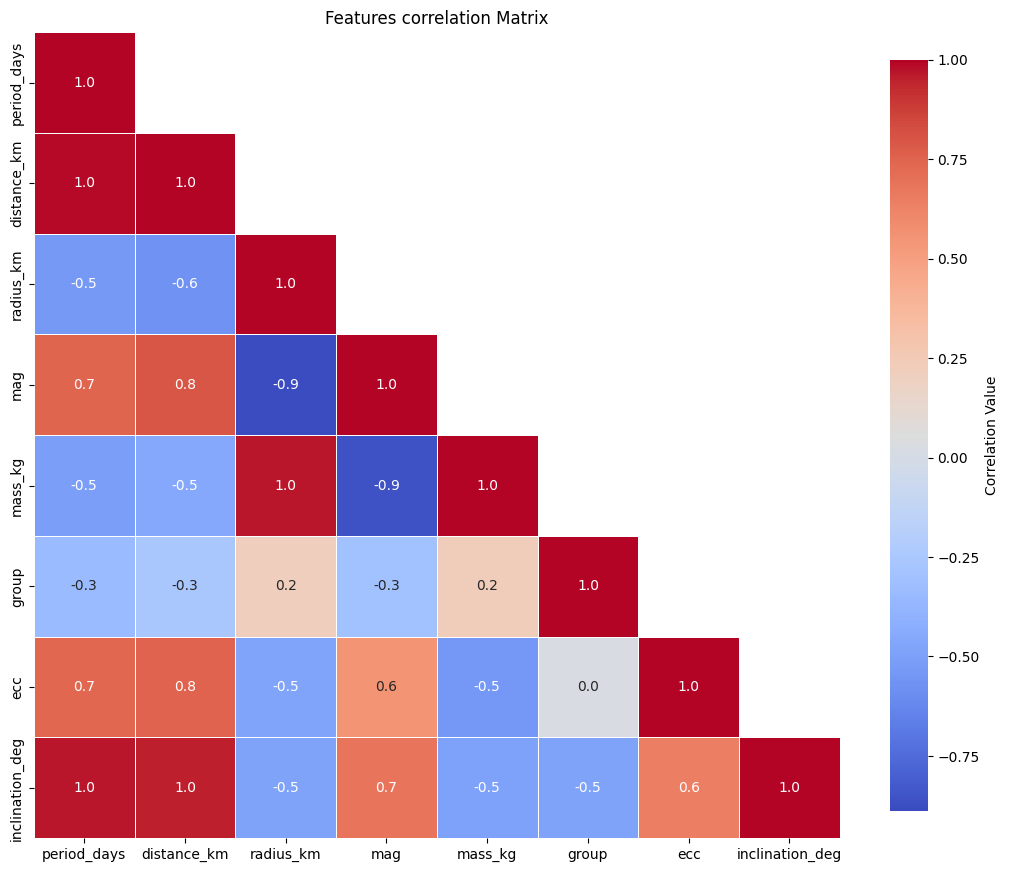

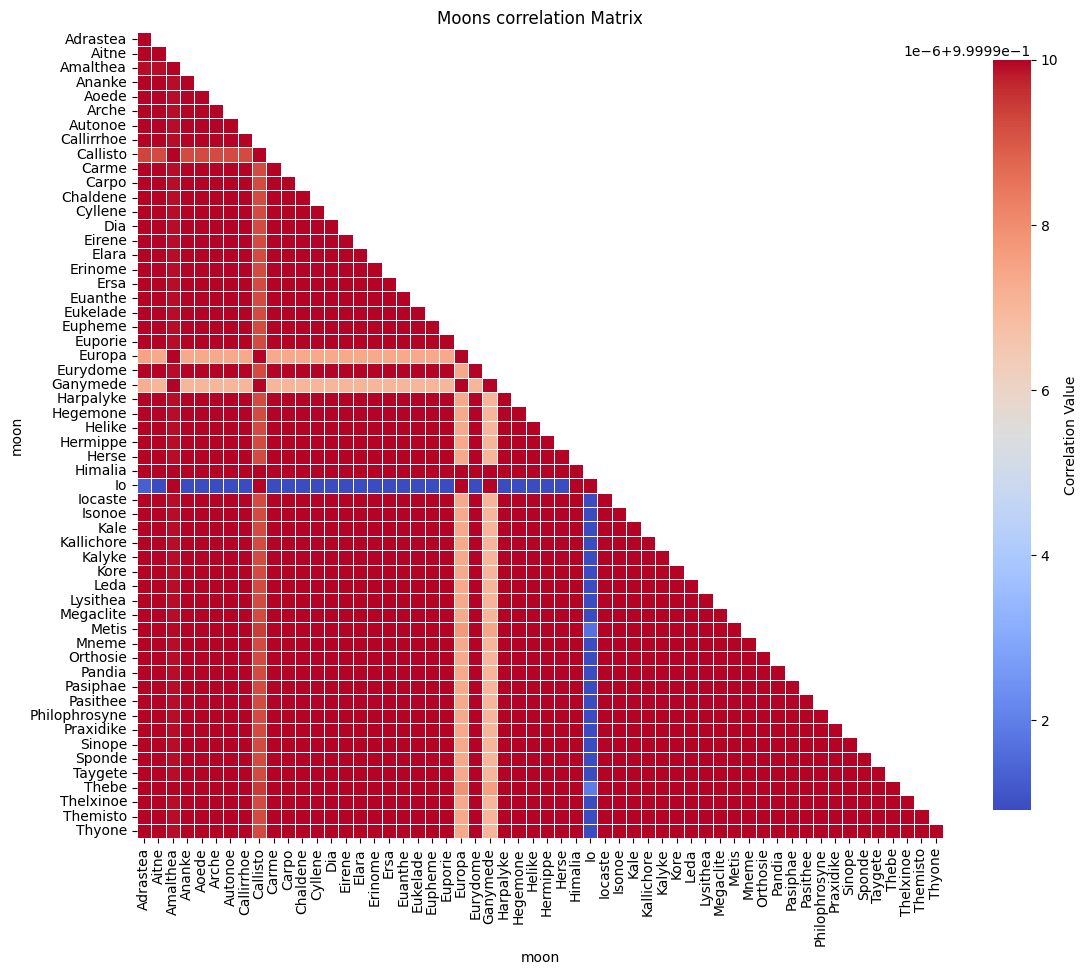

In [13]:
moons.visualise_corr()
moons.visualise_corr('row')


10. plot_distribution (self, column:string)
    
    Plotting the distribution of a specific feature
    - Returns a histogram of a given column
    
    

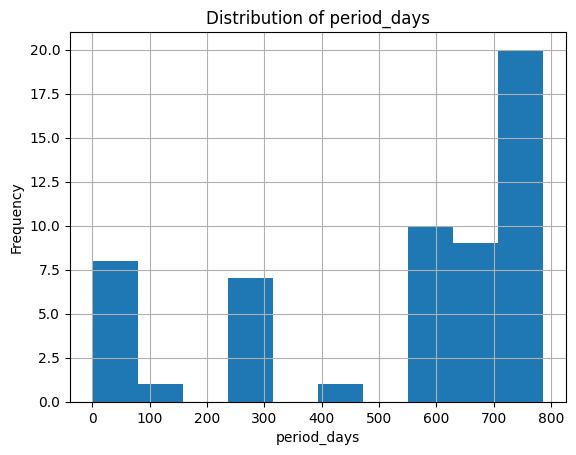

In [14]:
moons.plot_distribution('period_days')

11. feature_histograms (self) 

    Plotting histograms for all features
    - Plots destribution of every feature in the dataset
    

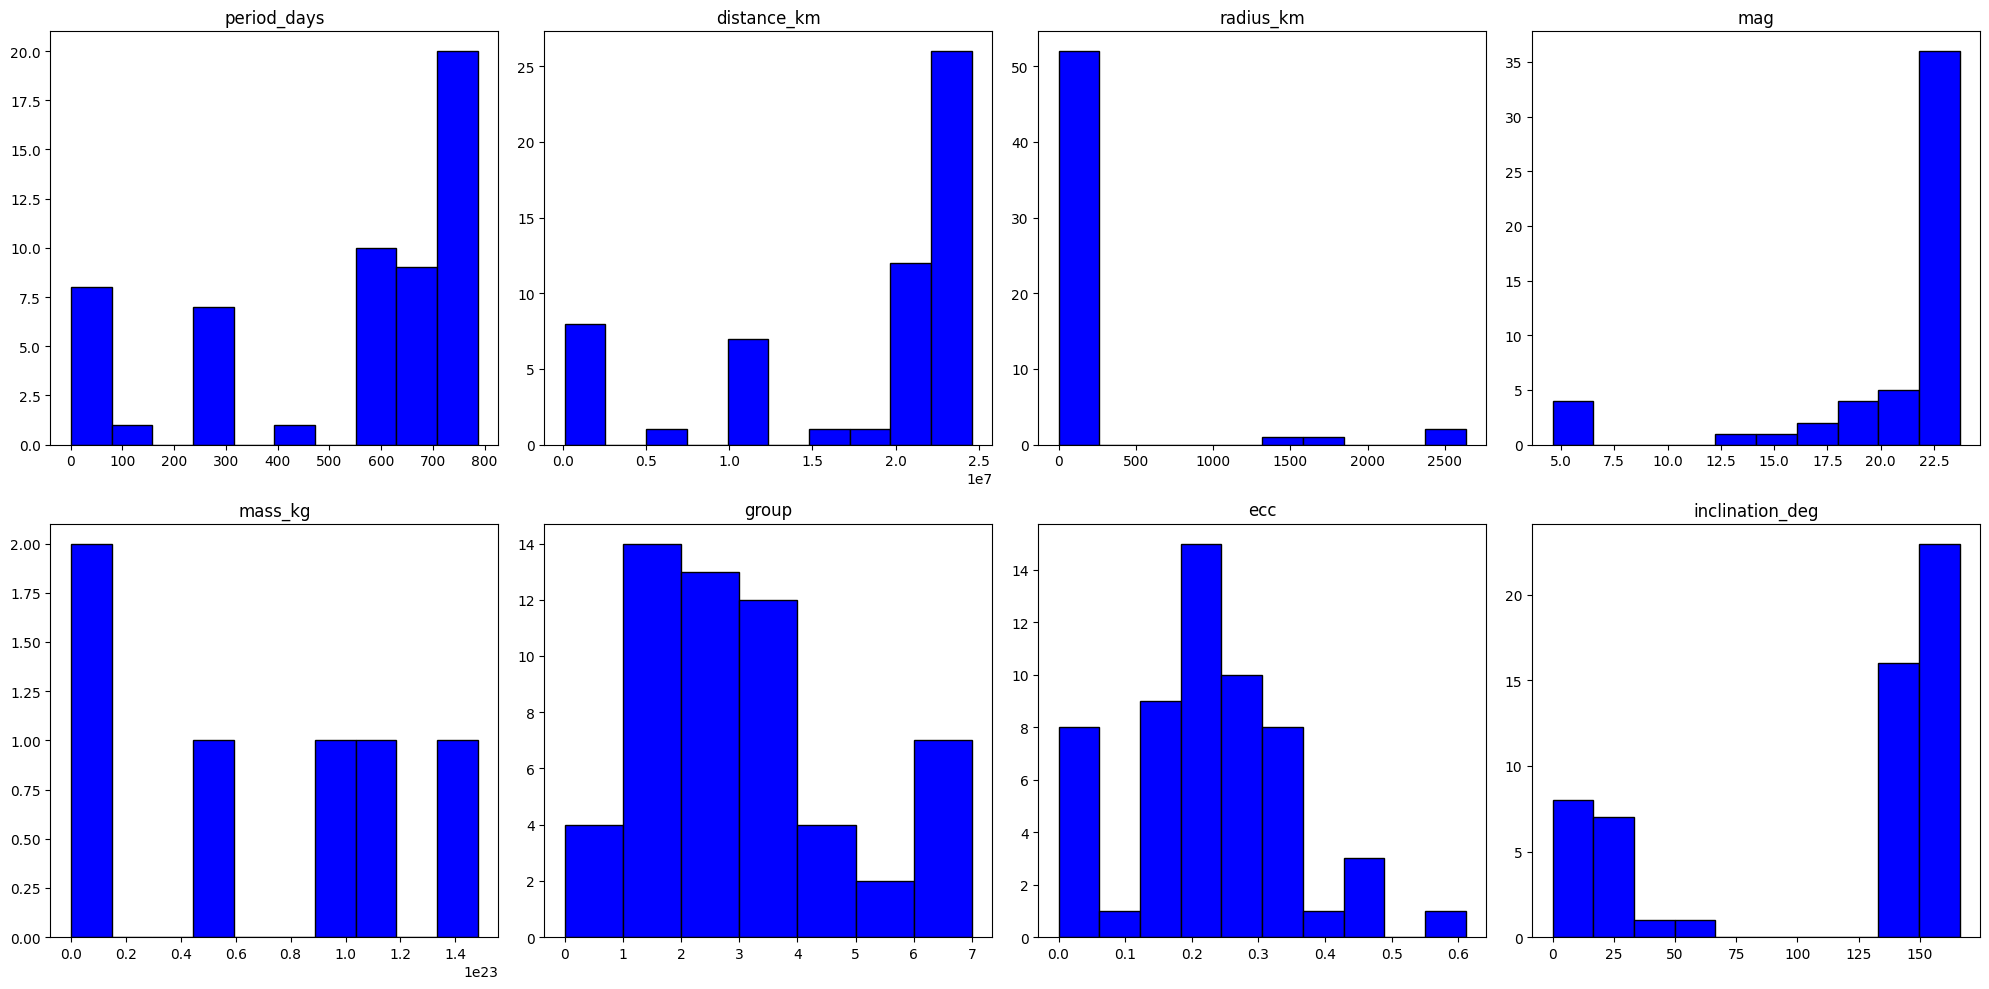

In [15]:
moons.feature_histograms()

12. feature_box_plots(self) 

    Plotting box plot for all features
    - Plots box plot of every feature in the dataset

In [16]:
moons.feature_box_plots()

13. feature_histograms_by_groups (self)

    Plotting histograms for all features based on it's group
    - Plots destribution of every feature in the dataset
    - This method only works if there is a numerical 'group' column in the dataset
    - The method automatically ignores 'mass_kg' column due to large values resulting in error
    - Groups corresponding to each color can be seen in 'group' plot

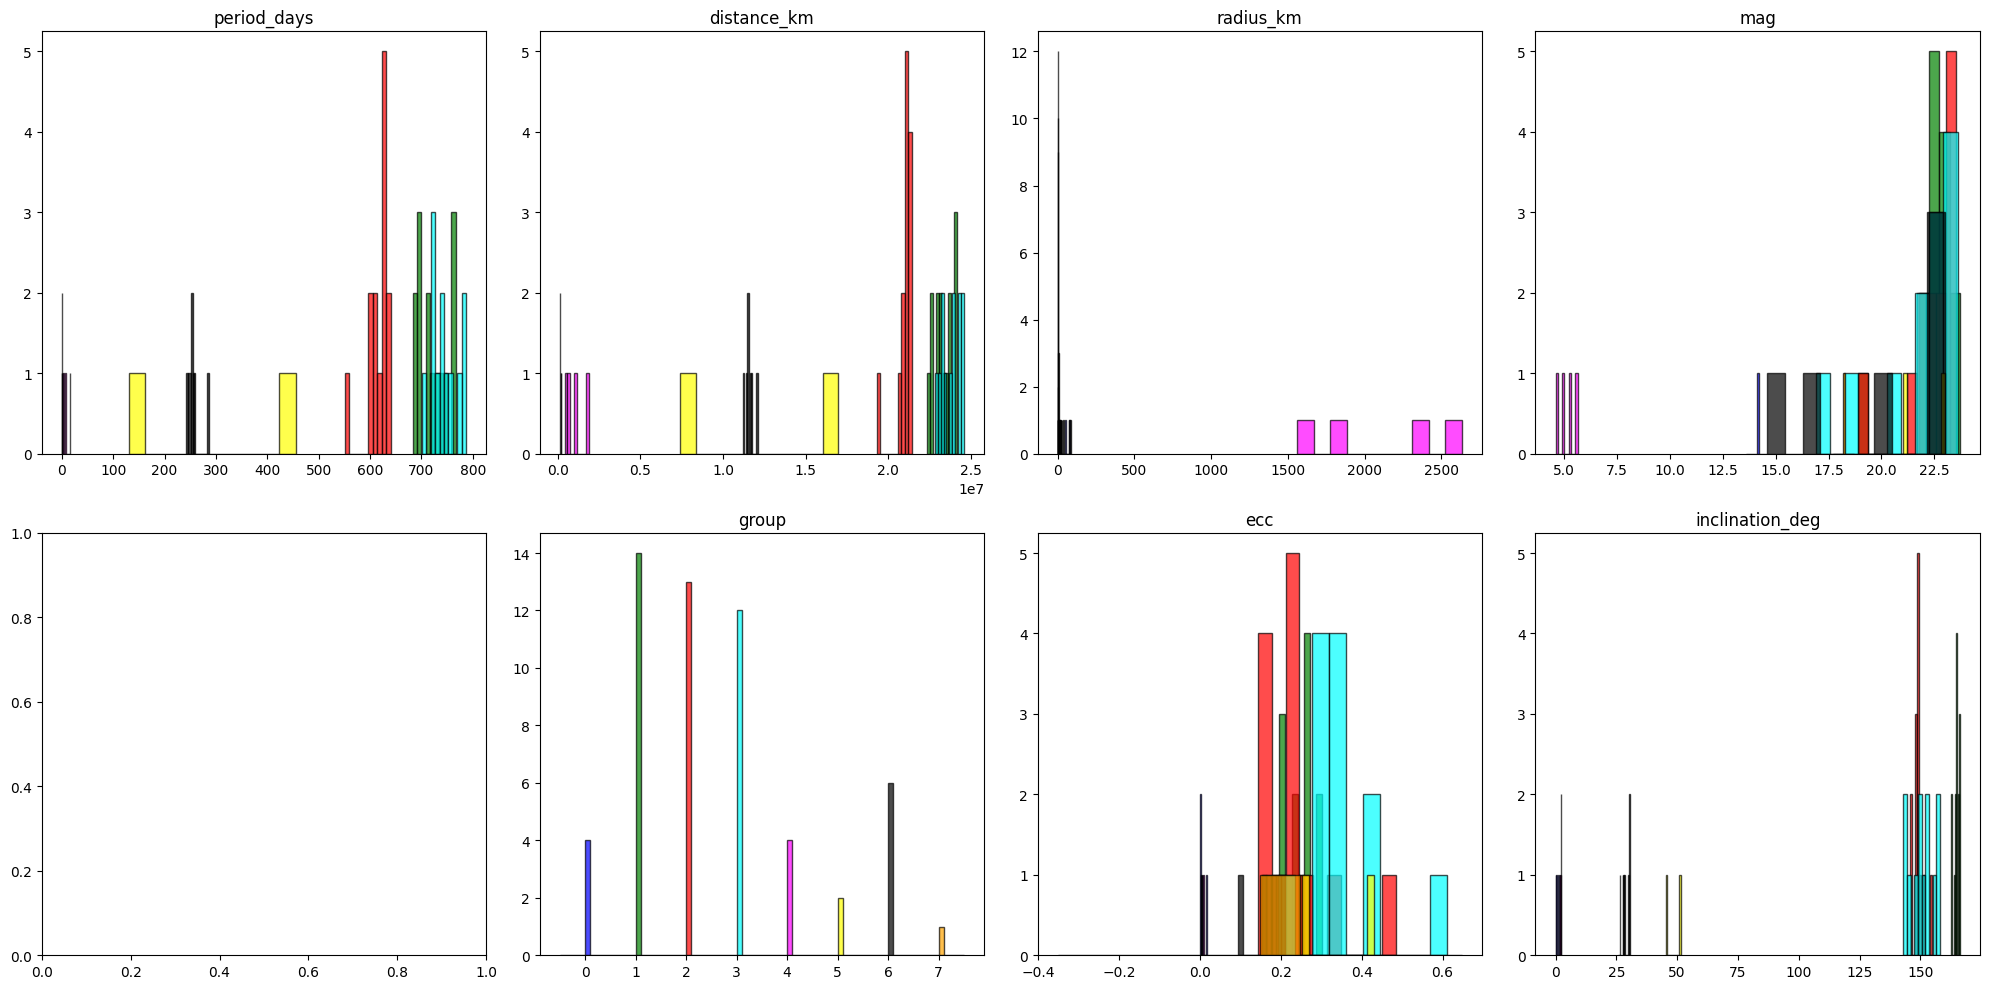

In [ ]:
moons.feature_histograms_by_groups()

# 3. Data analysis
This is the last part of this notebook. Here we use methods above to analyse the jupiter.db database.

## Data loading
First, import the module, load the data. As we know from instructions above, the dataframe index is set to 'moon' column by default.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from jupiter import Moons

filepath='jupiter.db'
moons=Moons(filepath)



## Data Inspection
Let's look into the features and moons we have:

In [ ]:
print('Features are the following:\n',moons.get_features())
print('\nThe number of features is ',len(moons.get_features()))

print('The number of moons is ',moons.get_moon_count())


Features are the following:
 ['period_days', 'distance_km', 'radius_km', 'mag', 'mass_kg', 'group', 'ecc', 'inclination_deg']

The number of features is  8
The number of moons is  56


Let's look at the data types of each column:

In [ ]:
print(moons.get_feature_types())

{'period_days': 'float64', 'distance_km': 'float64', 'radius_km': 'float64', 'mag': 'float64', 'mass_kg': 'float64', 'group': 'object', 'ecc': 'float64', 'inclination_deg': 'float64'}


All features are numerical except for the 'group'. Let's look at it closer:

In [ ]:
print(moons.data['group'].head())

moon
Adrastea       Inner
Aitne          Carme
Amalthea       Inner
Ananke        Ananke
Aoede       Pasiphae
Name: group, dtype: object


As I assumed, the data is categorical. Let's look into how many groups are there:

In [ ]:
print('The groop types are: ',moons.data['group'].unique())
print('The total number of groups is ', len(moons.data['group'].unique()))

The groop types are:  ['Inner' 'Carme' 'Ananke' 'Pasiphae' 'Galilean' 'other' 'Himalia'
 'Hamilia']
The total number of groups is  8


Let's look on top of the data to understand the dataset better:

In [ ]:
print(moons.data.head())

          period_days  distance_km  radius_km   mag       mass_kg     group  \
moon                                                                          
Adrastea        0.298     129000.0        8.2   NaN           NaN     Inner   
Aitne         730.000   23231000.0        1.5  22.7           NaN     Carme   
Amalthea        0.498     181400.0       83.5  14.1  2.080000e+18     Inner   
Ananke        630.000   21300000.0       14.0  18.9           NaN    Ananke   
Aoede         761.000   24000000.0        2.0  22.5           NaN  Pasiphae   

               ecc  inclination_deg  
moon                                 
Adrastea  0.001500             0.03  
Aitne     0.264000           165.00  
Amalthea  0.003190             0.37  
Ananke    0.174725           148.60  
Aoede     0.432000           158.00  


We can immediately notice missing values in 'mag' and 'mass_kg' columns.

Let's pay more attention to the missing values:

In [ ]:

print(moons.count_missing_values('col'))


{'period_days': 0, 'distance_km': 0, 'radius_km': 0, 'mag': 3, 'mass_kg': 50, 'group': 0, 'ecc': 0, 'inclination_deg': 0}


Only two columns containing missing values are mass_kg and mag.

Thus we have 53 samples available for 'mag' and only 6 for 'mass_kg'.

Most columns are numerical, so it seems intuitive to run regression on the mass_kg and mag columns. Although this depends on how correlated features are and what their distributions and graphs look like against each other. We will look into this later.

Regardless of this, we are looking at mostly numerical data. To understand it better we should make the only categorical feature numerical as this will help with correlation table, plots and future potential regression:



In [ ]:
moons.numerical_categorical_mapping('group')

print(moons.data.head())

print('\ngroup name to number mapping is the following: ', moons.group_dictionary)

          period_days  distance_km  radius_km   mag       mass_kg  group  \
moon                                                                       
Adrastea        0.298     129000.0        8.2   NaN           NaN      0   
Aitne         730.000   23231000.0        1.5  22.7           NaN      1   
Amalthea        0.498     181400.0       83.5  14.1  2.080000e+18      0   
Ananke        630.000   21300000.0       14.0  18.9           NaN      2   
Aoede         761.000   24000000.0        2.0  22.5           NaN      3   

               ecc  inclination_deg  
moon                                 
Adrastea  0.001500             0.03  
Aitne     0.264000           165.00  
Amalthea  0.003190             0.37  
Ananke    0.174725           148.60  
Aoede     0.432000           158.00  

group name to number mapping is the following:  {'Inner': 0, 'Carme': 1, 'Ananke': 2, 'Pasiphae': 3, 'Galilean': 4, 'other': 5, 'Himalia': 6, 'Hamilia': 7}


Now group column is numerical as well.

At this point we understand what the dataset is. Let's look into the statistical summary of it's features:

In [ ]:
print(moons.summary_statistics())

       period_days   distance_km    radius_km        mag       mass_kg  \
count    56.000000  5.600000e+01    56.000000  53.000000  6.000000e+00   
mean    525.998146  1.775655e+07   158.969643  20.418302  6.551798e+22   
std     272.670243  8.253688e+06   557.730632   4.926587  6.010469e+22   
min       0.290000  1.280000e+05     1.000000   4.610000  2.080000e+18   
25%     258.750000  1.170252e+07     1.500000  20.800000  1.200276e+22   
50%     632.500000  2.129009e+07     2.000000  22.500000  6.865891e+22   
75%     725.500000  2.336375e+07    11.562500  23.000000  1.030252e+23   
max     787.000000  2.458309e+07  2634.100000  23.700000  1.481900e+23   

           group        ecc  inclination_deg  
count  56.000000  56.000000        56.000000  
mean    2.589286   0.222922       113.571607  
std     1.796732   0.126899        64.562822  
min     0.000000   0.000200         0.030000  
25%     1.000000   0.159201        30.582500  
50%     2.000000   0.228000       148.600000  
75% 

Let's report on every column's statistical summary:

1) period days:
    - std is high which suggests significant variability between moons 
    - Mean is less than 1 std away from the median, also median>mean which suggests distribution skewed to the right.
    - 50th percentile is closer to 75% than to 25% which suggests scewed to right distribution.
2) distance_km:
    - distribution is scewed to right as percentiles are close but mean is much smaller. it, as well as high variance, indicates significant spread and presence of ouitliers in data.
3) radius_km:
    - same as distance_km but scewed to left.
4) mag:
    - a very nice normal-looking distribution. deviation is small and mean is close to median. Percentiles are very tight as well.
5) mass_kg:
    - only 6 samples available, not enough data.
6) group:
    - categorical data. Although we can assume that is is roughly normally distributed with pretty average std.
7) ecc:
    - min and max indicate presence of outliers, although their effect is not significant. It is visible from symmetric percentiles and how close mean is to median.
8) inclination_deg:
    - it seems like there are few outliers, which is nice. std is high which suggests significant spread in data.
    - data is scewed to right which can be seen from 25th percentile being much further from 50th than 50th from 75th.
    - mean < median (although not far, much less than 1 std).

Let's look at feature histograms to compare our statistical assumptions and try to understand the distributions:

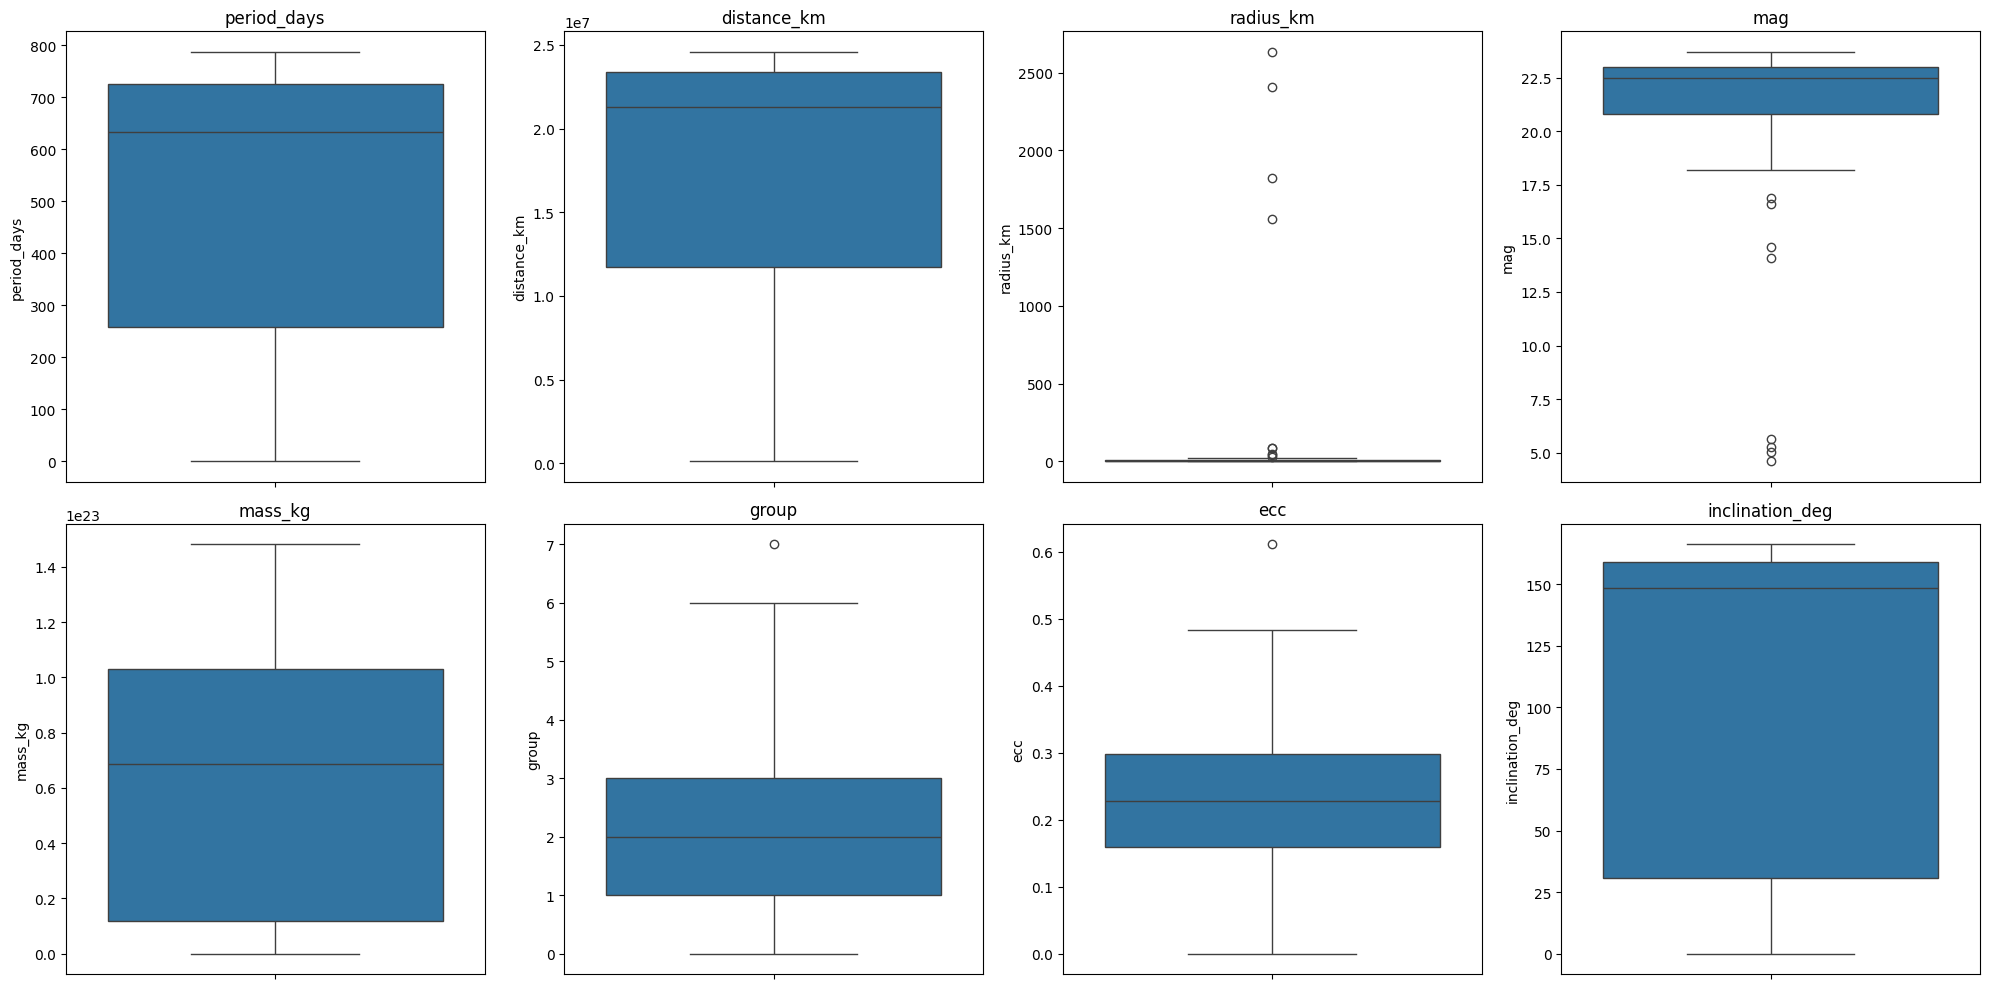

In [ ]:
moons.feature_box_plots()

Box plots confirm our assumptions.
- Group and ecc are very tightly distributed
- Radius_km and mag are very loosely distributed and have outliers.

Let's look at histograms to understand distributions better. We might use them for a hypothesis test or sampling later?

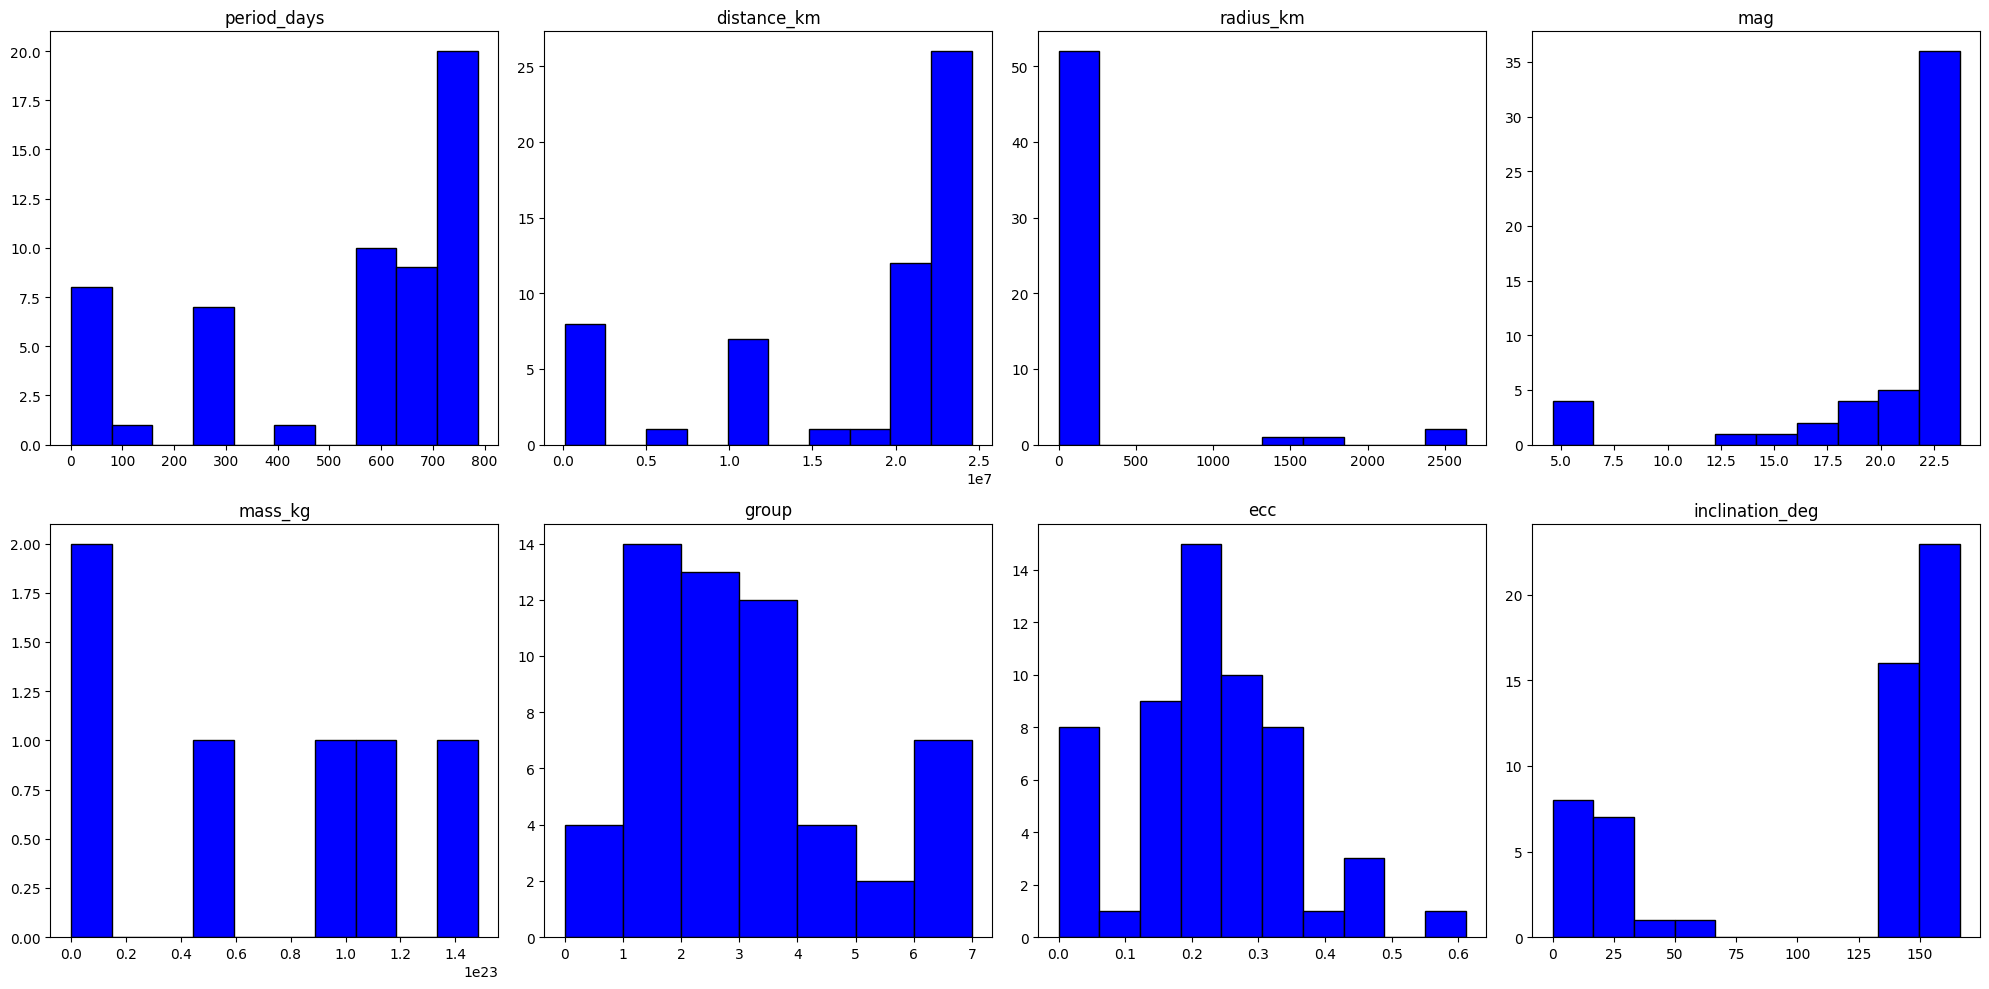

In [ ]:
moons.feature_histograms()

Looking at graphs, the only one distribution I can assume is ecc, which would be normal. Mass_kg also looks like exponential, but we have too few samples to judge. We will recall in the 'Regression' section, after we fill the misssing values.

The rest of the data seeems pretty spread and reminds me of no known distribution.

One last thing we will do is look at the difference between groups. We will compare histograms for this. More inter-group comparison will be done in the "Regression" section later in this notebook.

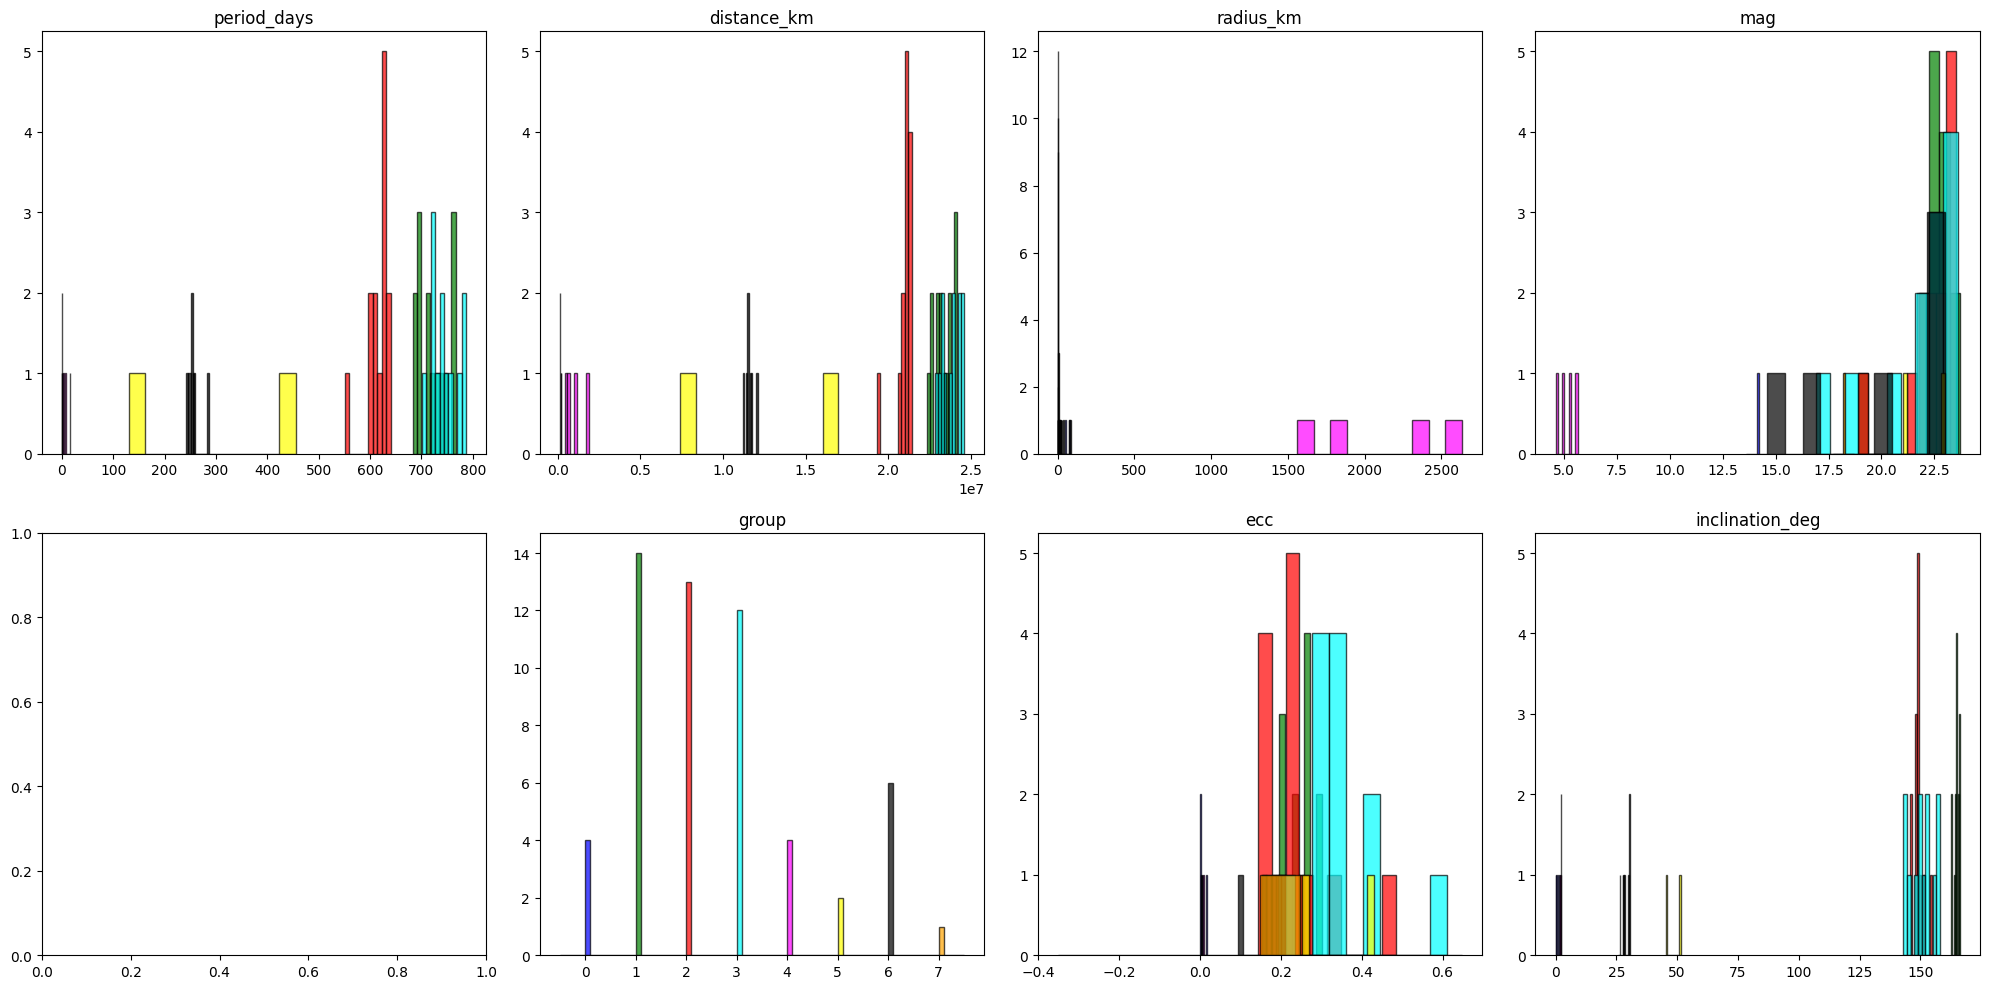

In [ ]:
moons.feature_histograms_by_groups()

From the plots above we can notice certain differences:
- in mag and radius features group 4 is an outlier, while other groups are very close to each other.
- in inclination_degree there are ~5 clusters of data, with 1 of them exclusive to groups 1 and 6.
- distance and period plots essentially duplicate each other. Their distribution is very similar with exception of group 4 (pink) being different. This is probably due to it having much higher radius_km (which is also visible on histogram).
- in ecc group 6 has its own cluster while the rest of groups is next to each other
- in distance_km all groups essentially have their own clusters. They rarely intersect.


Conclusion: it is important to notice that while statistical summary of the whole dataset shows significant variance in features, splitting the data by groups clearly shows that variance within each group is small and that there are several very separated data clusters. Individual group clusters usually follow somewhat normal distribution.

Difference and distance between groups explains the data spread of several features.

I think at this point we have detected several interesting patterns and gained a solid understanding of the dataset. 

There are more plots i would like to build(correlation table between features or moons, graphs for pairs of features), but they are useful for filling the Nan values in the dataframe, so we will look into them in the 'Regression' section.

## Regression

The aim here is to fill missing nan values in mag and mass features, then perhaps to try and figure out the random distribution of mass_kg feature.

First, let's look into feature correlation matrix:

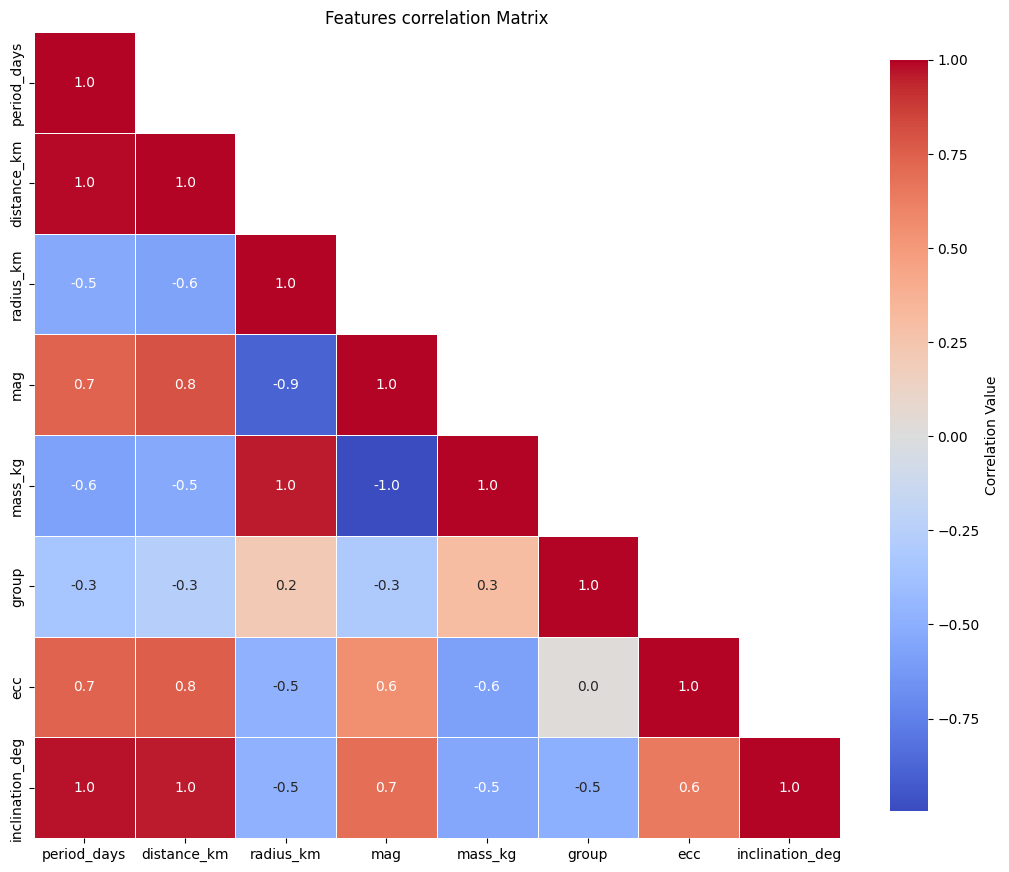

In [ ]:
moons.visualise_corr()

Let's exctract correlation values we are interested in:

In [ ]:
moons.calculate_correlation_matrix()[['mag','mass_kg']]

,mag,mass_kg
period_days,0.742646,-0.573825
distance_km,0.799187,-0.528140
radius_km,-0.887393,0.956852
mag,1.000000,-0.994406
mass_kg,-0.994406,1.000000
group,-0.303667,0.301817
ecc,0.554617,-0.588179
inclination_deg,0.688529,-0.549831


Let's sort the rows by their absolute value:

In [ ]:
print(moons.calculate_correlation_matrix()[['mag']].sort_values(by='mag', key=abs))
print('\n',moons.calculate_correlation_matrix()[['mass_kg']].sort_values(by='mass_kg', key=abs))


                      mag
group           -0.303667
ecc              0.554617
inclination_deg  0.688529
period_days      0.742646
distance_km      0.799187
radius_km       -0.887393
mass_kg         -0.994406
mag              1.000000

                   mass_kg
group            0.301817
distance_km     -0.528140
inclination_deg -0.549831
period_days     -0.573825
ecc             -0.588179
radius_km        0.956852
mag             -0.994406
mass_kg          1.000000


We can see that mag is highly correlated with radius, mass, distance, while mass is correlated with mag and radius_km. We will consider subsets of those parameters in our predictions.



Let's try to look into mag first. Lets see which group do missing values belong to.

In [ ]:
moons.data [moons.data ['mag'].isna()]

,period_days,distance_km,radius_km,mag,mass_kg,group,ecc,inclination_deg
moon,,,,,,,,
Adrastea,0.298,129000.0,8.2,NaN,NaN,0,0.0015,0.03
Metis,0.290,128000.0,21.5,NaN,NaN,0,0.0002,2.00
Thebe,0.670,221889.0,49.0,NaN,NaN,0,0.0175,1.10


In [ ]:
moons.data [moons.data['group']==0]

,period_days,distance_km,radius_km,mag,mass_kg,group,ecc,inclination_deg
moon,,,,,,,,
Adrastea,0.298,129000.0,8.2,NaN,NaN,0,0.00150,0.03
Amalthea,0.498,181400.0,83.5,14.1,42.1789,0,0.00319,0.37
Metis,0.290,128000.0,21.5,NaN,NaN,0,0.00020,2.00
Thebe,0.670,221889.0,49.0,NaN,NaN,0,0.01750,1.10


All of them belong to group 0. 

Let's look at those features closer:

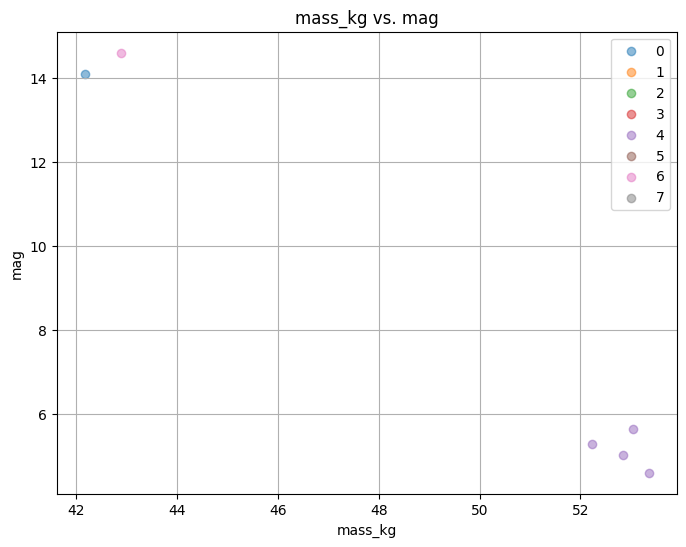

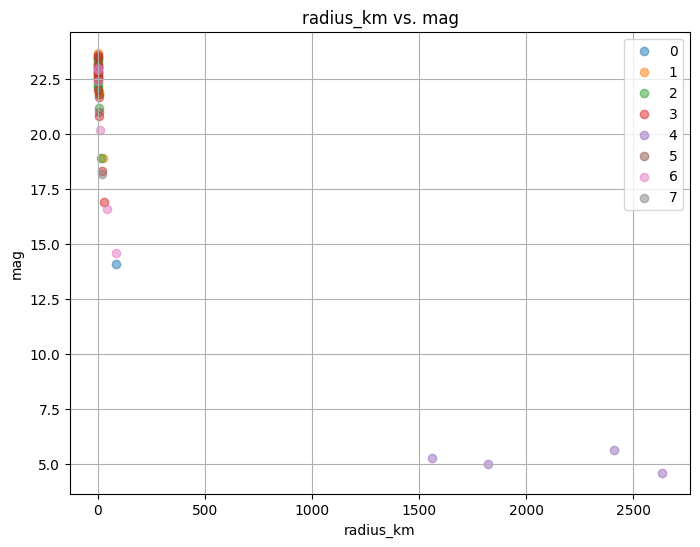

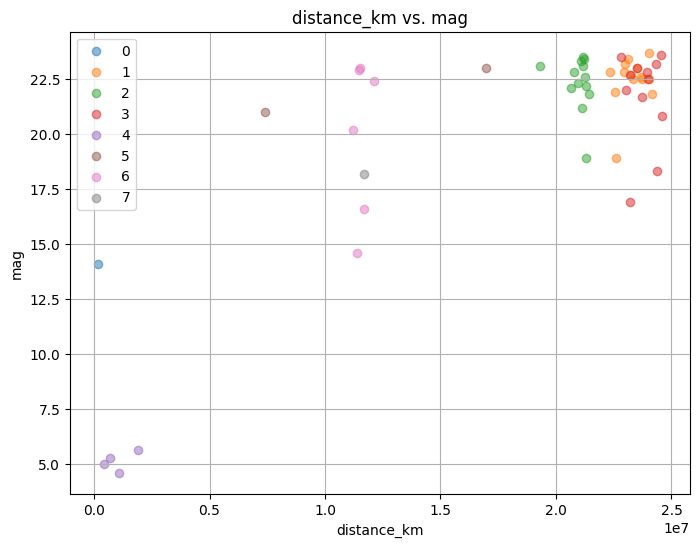

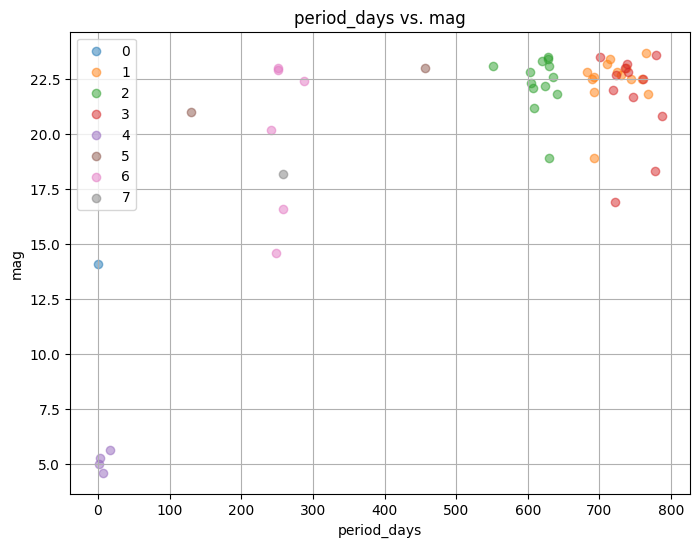

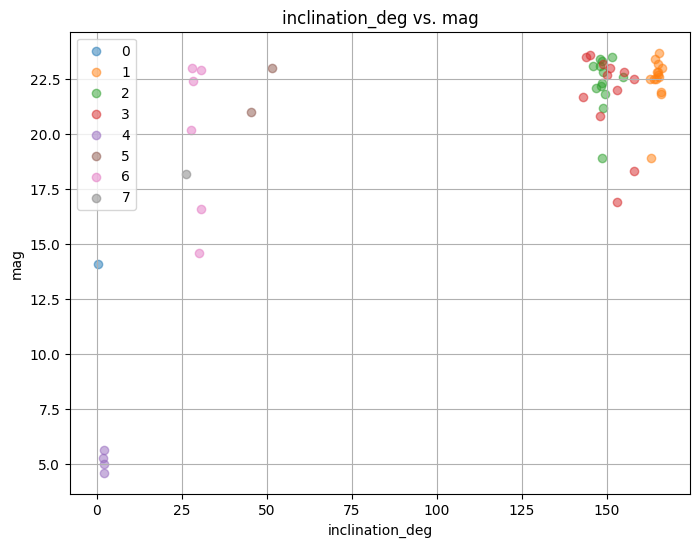

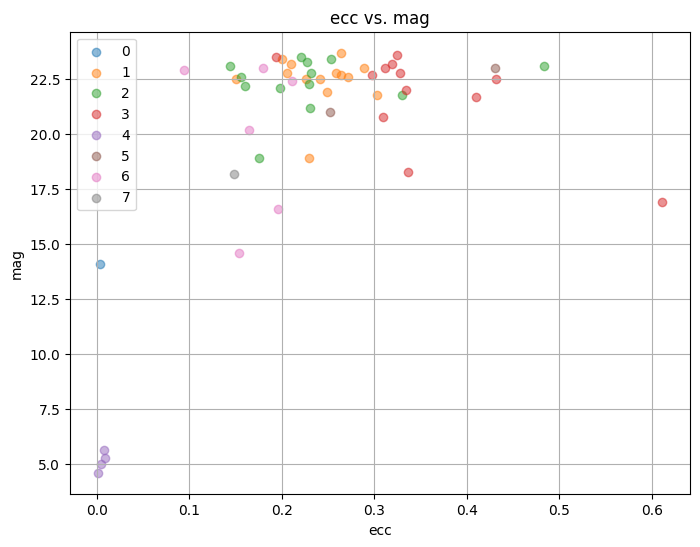

In [ ]:


moons.plot_columns('mass_kg','mag',use_group=True)
moons.plot_columns('radius_km','mag',use_group=True)
moons.plot_columns('distance_km','mag',use_group=True)
moons.plot_columns('period_days','mag',use_group=True)
moons.plot_columns('inclination_deg','mag',use_group=True)
moons.plot_columns('ecc','mag',use_group=True)



Out of those, the most interesting ones for mag are radius_km and ecc. For radius_km relation looks like 1/x graph, and for ecc relation seems linear or parabolic. The rest of features essentially duplicate each other in plots, so no point in using them. I would chose ecc because it is similar to others but seems to have least variance. 

BUT!!! each group seems to have high magnitude variance, but low variance in  'distance_km','period_days','inclination_deg','ecc','mass_kg' inside of every individual group. This is crucial. It indicates that we shouldn't use those parameters because THE GROUPS are different on them, but not SEPARATE VALUES within those groups. Essentially 'mag' value paired with 'ecc' value for example wont provide info on individual mag values because there is no correlation WITHIN each INDIVIDUAL group. same for other parameters. 

Thus the only parameter we can use to pair with 'mag' is 'radius_km' because it seems to have ~1/x relation EVEN WITHIN SEPARATE GROUPS, and we are interested in ONE grouop number 0.





In [ ]:
print(moons.group_dictionary)

{'Inner': 0, 'Carme': 1, 'Ananke': 2, 'Pasiphae': 3, 'Galilean': 4, 'other': 5, 'Himalia': 6, 'Hamilia': 7}


Group 0 is not 'other', so it makes sense to assume that there will be something in common between moons in this group.

Mass_kg has very little data which we will restore after. 

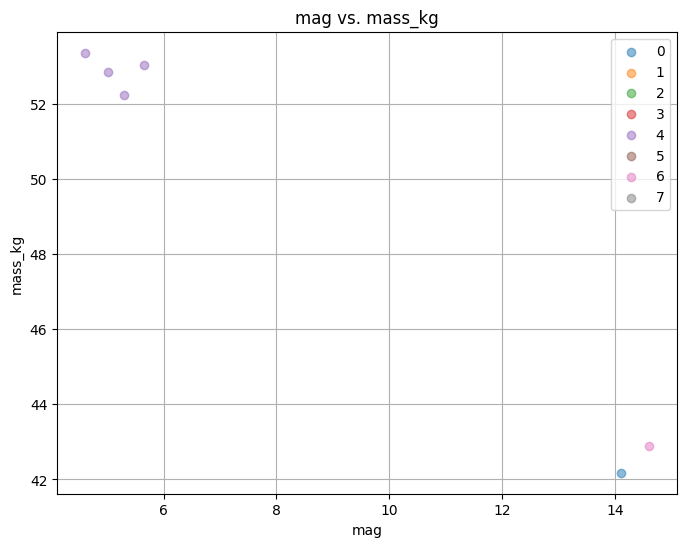

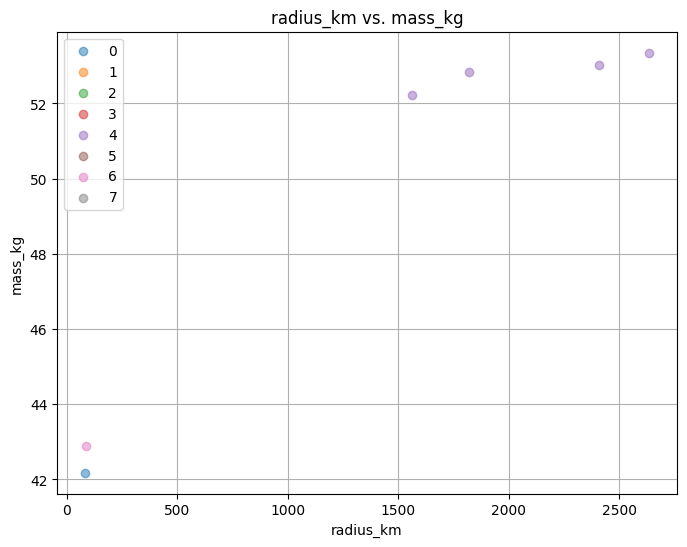

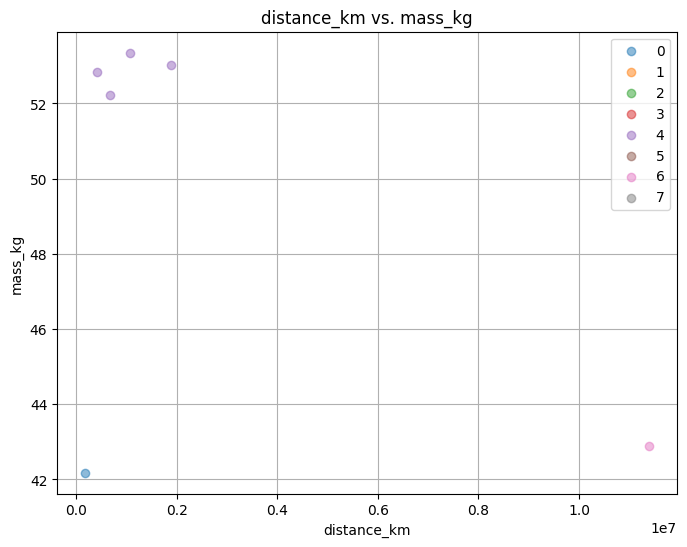

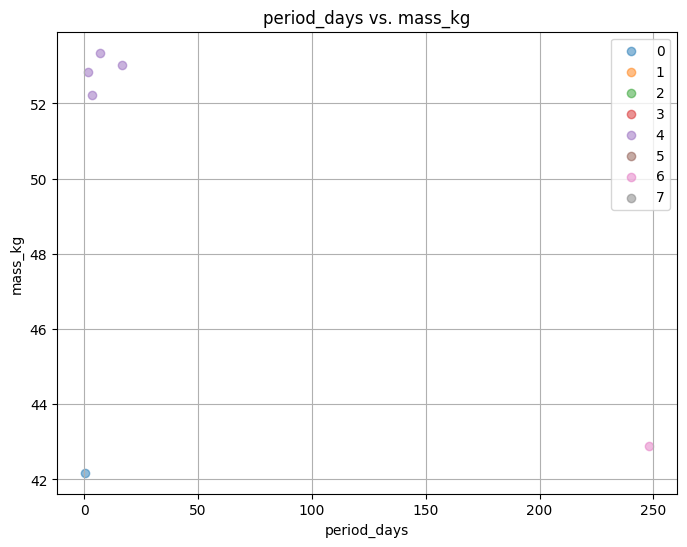

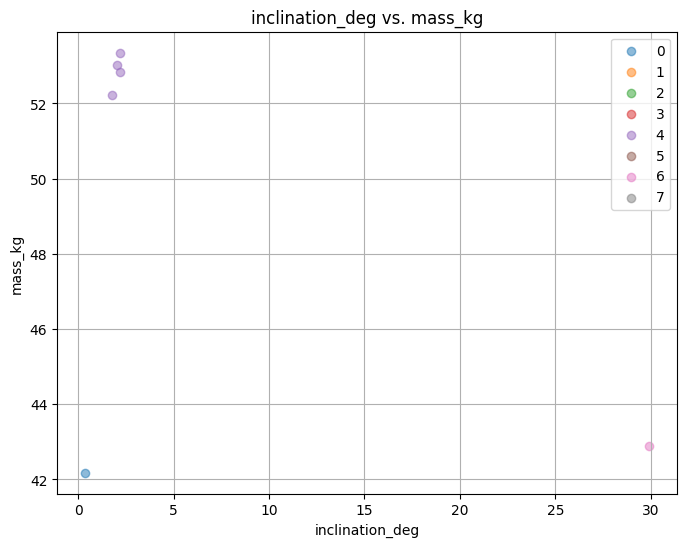

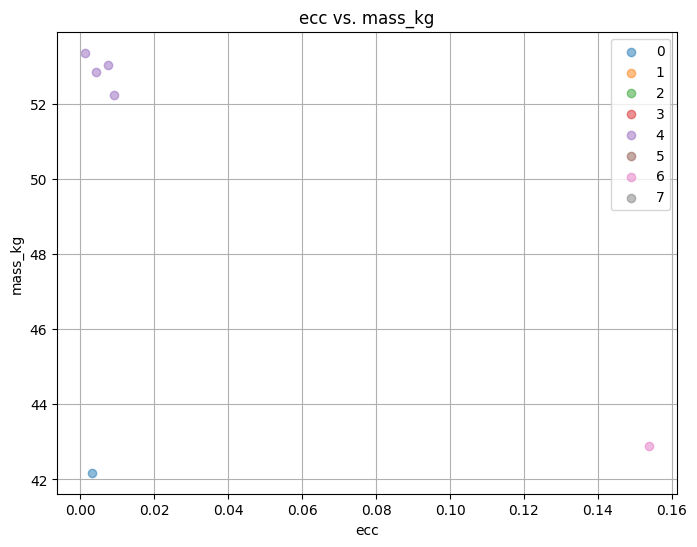

In [ ]:
moons.plot_columns('mag','mass_kg',use_group=True)
moons.plot_columns('radius_km','mass_kg',use_group=True)
moons.plot_columns('distance_km','mass_kg',use_group=True)
moons.plot_columns('period_days','mass_kg',use_group=True)
moons.plot_columns('inclination_deg','mass_kg',use_group=True)
moons.plot_columns('ecc','mass_kg',use_group=True)

For mass_kg we will use mag and radius_km. It's because for the rest of the features plots seem unreliable, while for radius_km and mag relation looks somewhat linear(although we have literally no data on what's in between edge values).

Let's prepare the features for regression: mass_kg, radius_km and mag.

let's look at mag vs radius_km plot once again:

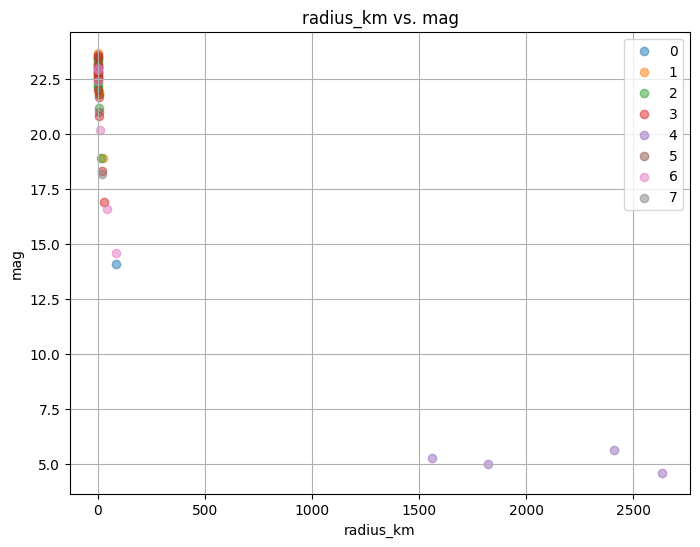

In [ ]:
moons.plot_columns('radius_km','mag',use_group=True)

It looks like we will have to transform features for regression. 

In [ ]:
moons.data['mag']=moons.data['mag']**-3

By trial and error i found that optimal function is y=x^-3. Now data looks a lot more linear:

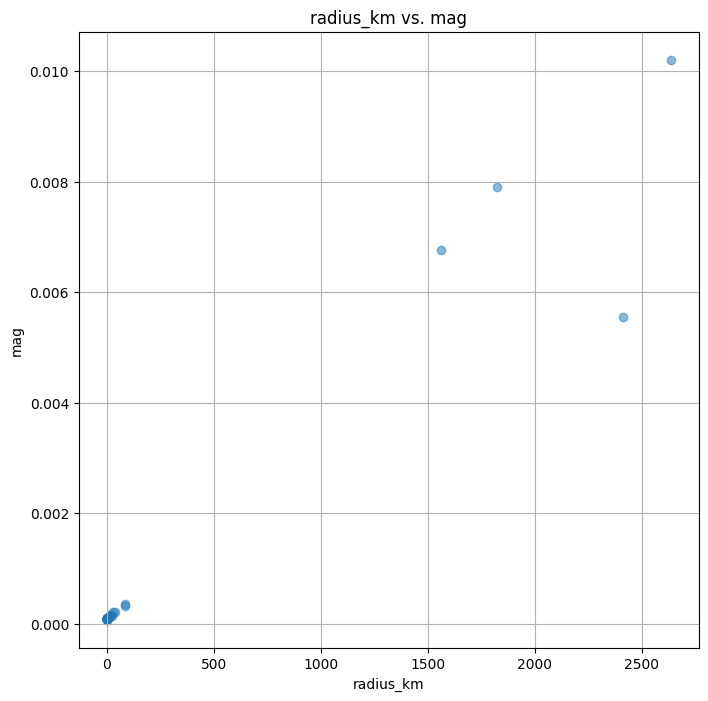

In [ ]:
column_x = 'radius_km' 
column_y = 'mag'  

plt.figure(figsize=(8, 8))  
plt.scatter(moons.data[column_x], moons.data[column_y], alpha=0.5)  
plt.title(f'{column_x} vs. {column_y}')
plt.xlabel(column_x)
plt.ylabel(column_y)
plt.grid(True)
plt.show()

Let's apply linear regression to the transformed data, predict it and substitute back:

In [ ]:
acc=moons.linreg_subs(['radius_km'],'mag')

Transform it back by applying inverse function:

In [ ]:
moons.data['mag']=moons.data['mag']**-(1/3)

Looks like everything worked:

In [ ]:

print(moons.data [moons.data['group']==0])

          period_days  distance_km  radius_km        mag  mass_kg  group  \
moon                                                                       
Adrastea        0.298     129000.0        8.2  20.080335      NaN      0   
Amalthea        0.498     181400.0       83.5  14.100000  42.1789      0   
Metis           0.290     128000.0       21.5  18.059257      NaN      0   
Thebe           0.670     221889.0       49.0  15.559345      NaN      0   

              ecc  inclination_deg  
moon                                
Adrastea  0.00150             0.03  
Amalthea  0.00319             0.37  
Metis     0.00020             2.00  
Thebe     0.01750             1.10  


Blue points look exactly right. This is a great fit for parameters we used:

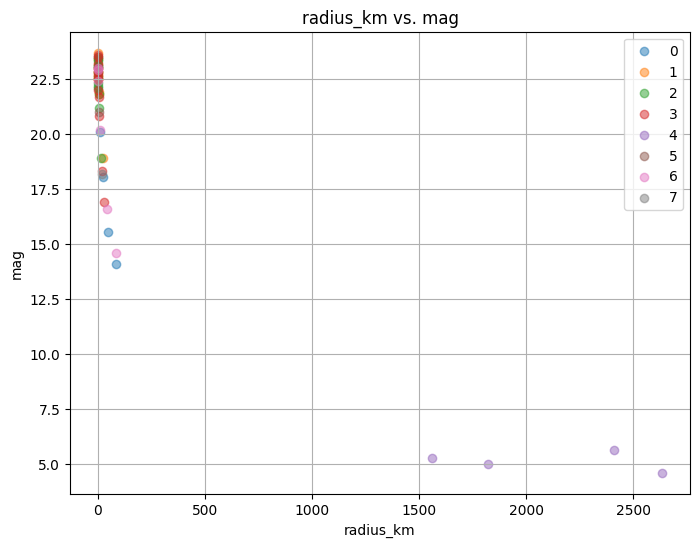

In [ ]:
moons.plot_columns('radius_km','mag',use_group=True)

We can also use accuracy metrics like r2 and RMSE:

In [ ]:
print('r2 score is: ', acc[0])
print('\nrmse score is: ', acc[1])

r2 score is:  0.9398377740705803

rmse score is:  0.0004993684033077721


Very impressive. R2 score is high and rmse is very low, which indicate high fit quality, which is expected with such amount of data.

At this point I realised that it probably wasnt worth doing for just 3 values out of 56 but it was too late. Should have just dropped them in the beginning.

Let's look at 2 other plots:

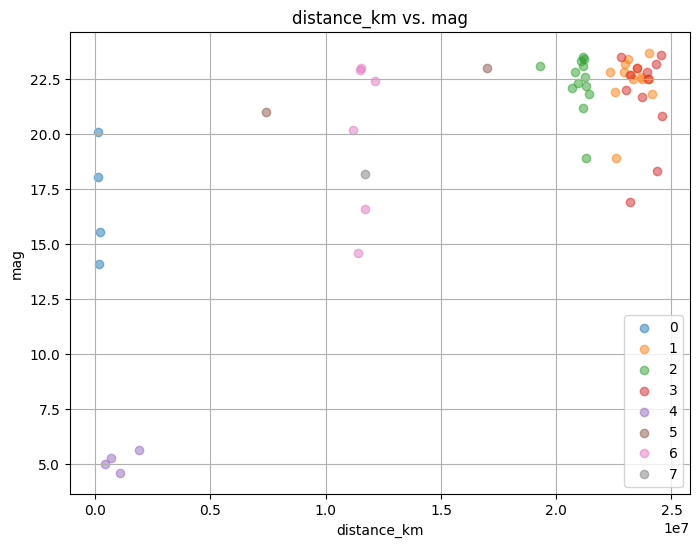

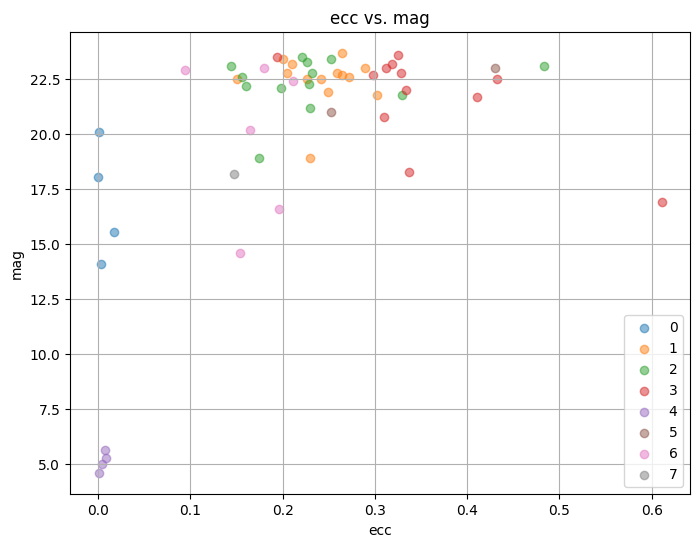

In [ ]:

moons.plot_columns('distance_km','mag',use_group=True)

moons.plot_columns('ecc','mag',use_group=True)

Looks great and confirms our assumptions from above: within 1 group ecc, distance and other parameters had no predictive power within groups.

This would be a lot more useful if more samples were missing.

Let's use the same approach for mass_kg feature:

In [ ]:
acc=moons.linreg_subs(['radius_km','mag'],'mass_kg')

We can see clear groupings, same as in 'mag' regression, which indicates a high goodness of fit:

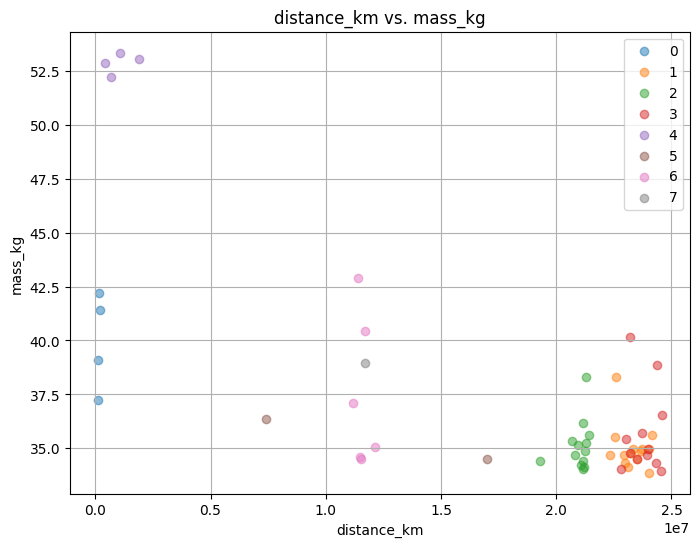

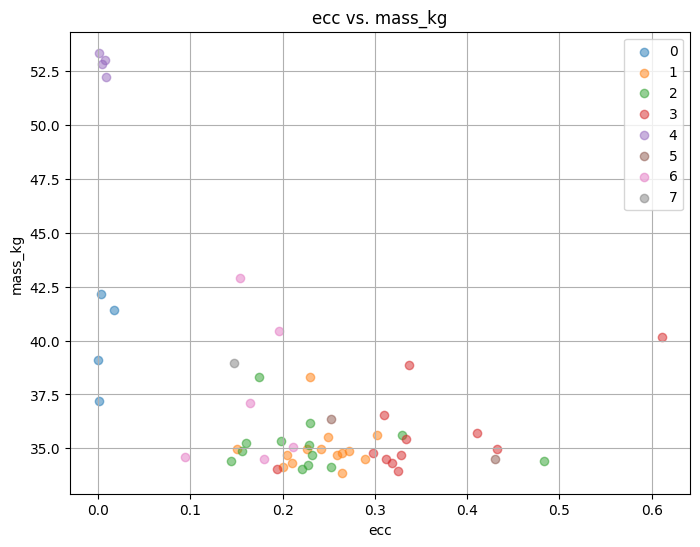

In [ ]:
moons.plot_columns('distance_km','mass_kg',use_group=True)

moons.plot_columns('ecc','mass_kg',use_group=True)

Looks like exactly what we would expect: on plots below we can see logarithmic growth for radius_km and an obvious linear trend for mag plot.

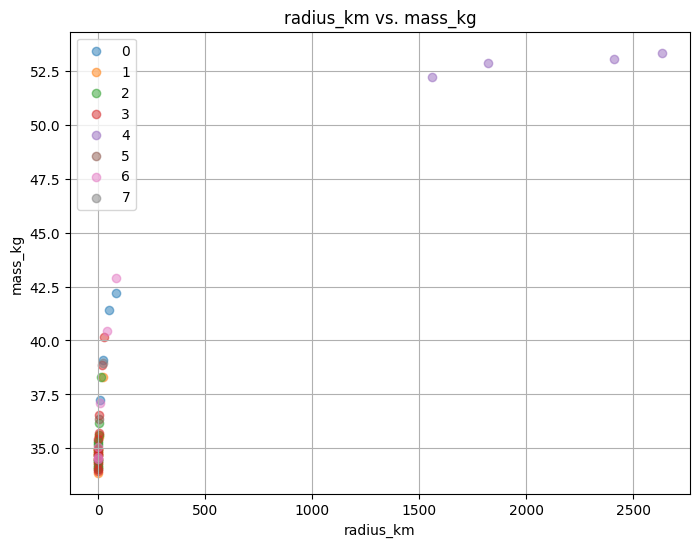

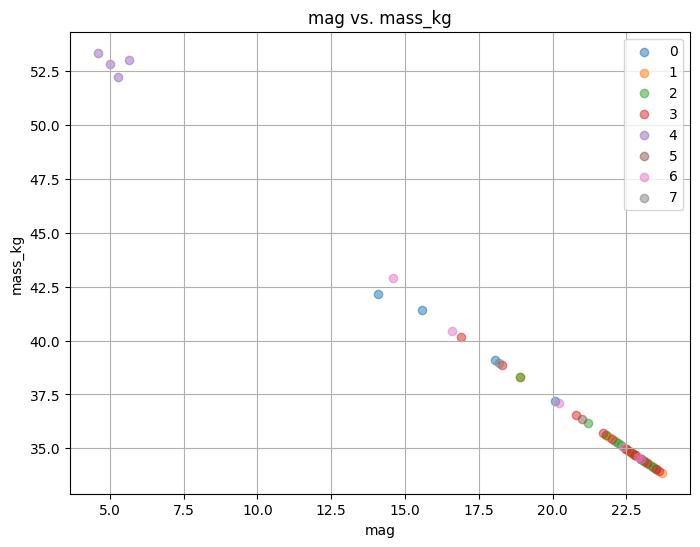

In [ ]:
moons.plot_columns('radius_km','mass_kg',use_group=True)
moons.plot_columns('mag','mass_kg',use_group=True)

Also use metrics:

In [ ]:
print('r2 score is: ', acc[0])
print('\nrmse score is: ', acc[1])

r2 score is:  0.9926731855808448

rmse score is:  0.4183363199662481


This is a very high r2 score and acceptable rmse. I think analysis above paid off if I did everything right.

### This is the end of analysis part. This was part 1 of the assesment. Part 2 is in different ipynb notebook.